# Análisis de correlación

In [ ]:
# @title Instala y carga las librerías

install.packages(c("rstatix", "psych", "ggpubr"))

library(tidyverse)
library(rstatix)
library(psych)
library(ggpubr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Visualización de datos

In [ ]:
data <- haven::read_sav("https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase8_BaseAnalisisDeCorrelacion.sav")

data %>% print(n = 10)

# A tibble: 100 × 6
   Participantes Bienestar_social Salud Resiliencia Estrés Depresión
   <chr>                    <dbl> <dbl>       <dbl>  <dbl>     <dbl>
 1 001                       37.0 108.         4.89 -15.0     -11.4 
 2 002                       91.8 137.         5.17 -12.9     -13.8 
 3 003                       35.3  88.1        3.50 -13.8     -10.1 
 4 004                       75.9 205.         3.51  -7.32     -9.65
 5 005                       39.2 147.         1.50  -8.89     -5.55
 6 006                       38.7  71.1        3.36 -13.8      -9.75
 7 007                       45.8  83.1        4.04  -7.72    -10.6 
 8 008                       49.8  93.4        5.28 -10.6     -12.2 
 9 009                       61.7 110.         4.53 -13.6     -11.2 
10 010                       40.7  61.2        4.20 -10.7      -7.38
# ℹ 90 more rows


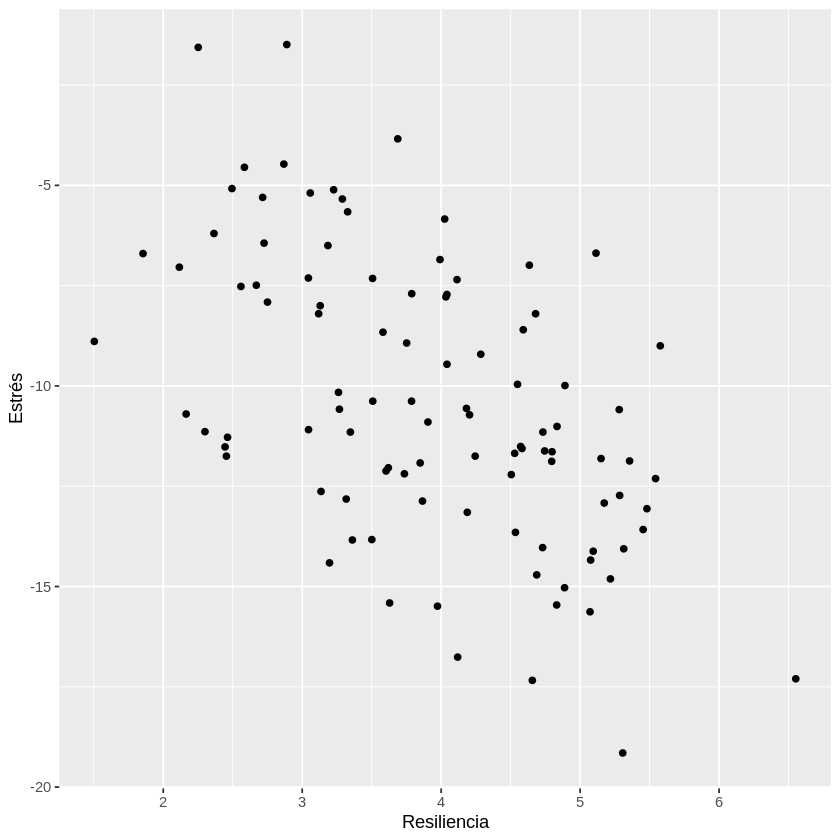

In [ ]:
data %>%
  ggplot(aes(x = Resiliencia, y = Estrés)) +
  geom_point()

# Descripción de los datos

In [ ]:
data %>% psych::describe()

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Participantes*,1,100,50.500000,29.011492,50.500000,50.500000,37.065000,1.000000,100.000000,99.000000,0.00000000,-1.2360552,2.9011492
Bienestar_social,2,100,50.852082,15.546557,49.533791,50.151748,14.054830,12.334894,105.545952,93.211058,0.53138909,0.8526679,1.5546557
Salud,3,100,103.945074,32.224664,100.193474,101.533921,37.392744,61.177939,204.576642,143.398703,0.60688597,-0.3102441,3.2224664
Resiliencia,4,100,3.910544,1.021960,3.939153,3.924856,1.174076,1.504087,6.551945,5.047858,-0.06373775,-0.7223282,0.1021960
Estrés,5,100,-10.383400,3.538318,-10.955000,-10.425375,4.040085,-19.150000,-1.490000,17.660000,0.14510151,-0.3595197,0.3538318
Depresión,6,100,-9.995600,2.156638,-10.045000,-10.017750,2.105292,-15.260000,-4.750000,10.510000,0.07999526,-0.4394083,0.2156638


# Análisis de normalidad

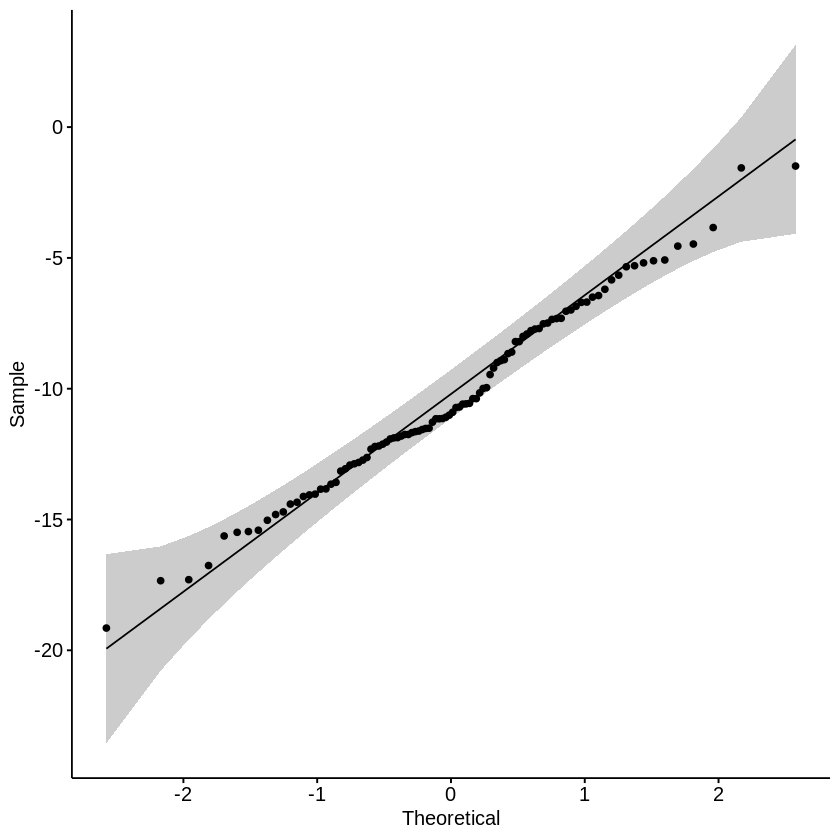

In [ ]:
data %>%
  ggpubr::ggqqplot(x = "Estrés")

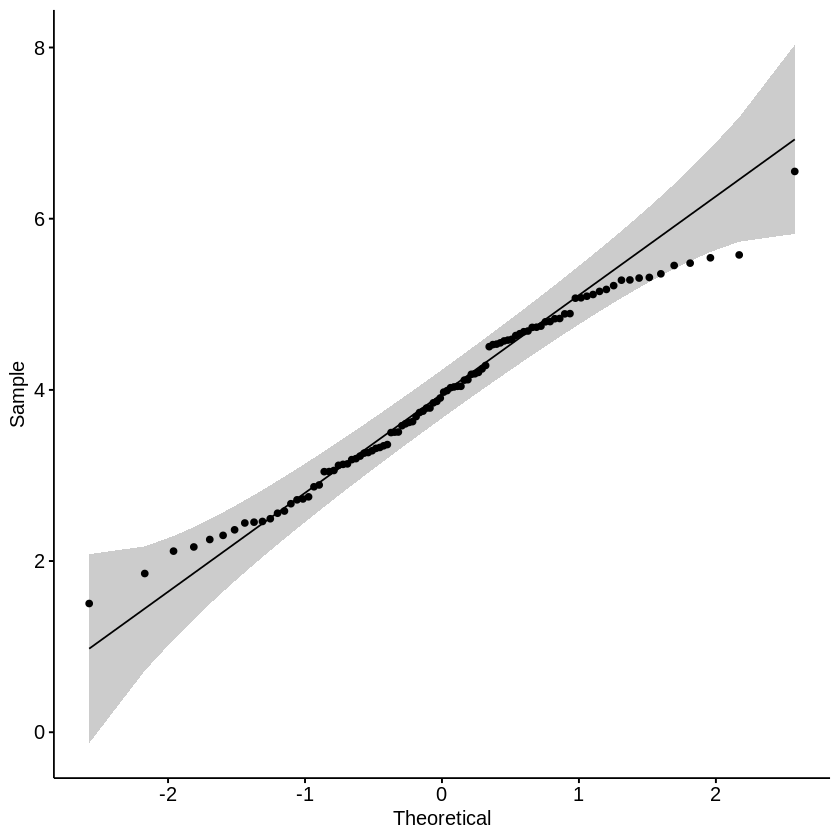

In [ ]:
data %>%
  ggpubr::ggqqplot(x = "Resiliencia")

In [ ]:
library(rstatix)

data %>%
  shapiro_test(Resiliencia, Estrés)

variable,statistic,p
<chr>,<dbl>,<dbl>
Estrés,0.9890795,0.5908361
Resiliencia,0.9836721,0.2537886


In [ ]:
data %>%
  select(Estrés, Resiliencia) %>%
  psych::describe()

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Estrés,1,100,-10.383400,3.538318,-10.955000,-10.425375,4.040085,-19.150000,-1.490000,17.660000,0.14510151,-0.3595197,0.3538318
Resiliencia,2,100,3.910544,1.021960,3.939153,3.924856,1.174076,1.504087,6.551945,5.047858,-0.06373775,-0.7223282,0.1021960


Ambas distribuciones se aproximan a la distribución normal. Por tanto, corresponde emplear un análisis de correlación paramétrico. En este caso, la correlación de Pearson.

In [ ]:
data %>%
  select(Estrés, Resiliencia) %>%
  psych::describe()

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Estrés,1,100,-10.383400,3.538318,-10.955000,-10.425375,4.040085,-19.150000,-1.490000,17.660000,0.14510151,-0.3595197,0.3538318
Resiliencia,2,100,3.910544,1.021960,3.939153,3.924856,1.174076,1.504087,6.551945,5.047858,-0.06373775,-0.7223282,0.1021960


# Análisis de correlación paramétrico

In [ ]:
data %>%
  cor_test(Resiliencia, Estrés)

var1,var2,cor,statistic,p,conf.low,conf.high,method
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Resiliencia,Estrés,-0.54,-6.409918,5.12e-09,-0.6685578,-0.3885766,Pearson


# Ejercicio

1. Plantear las hipótesis de trabajo (HT): analizar por separado cada hipótesis de trabajo puesto que cada una implica un H0 y H1 (hipótesis estadísticas). Ejm.: Se tiene la hipótesis que el bienestar social se asocia negativamente con sintomatología depresiva y con estrés.
- HT1: Bienestar se asocia negativamente con sintomatología depresiva. H0: rxy = 0 , H1: rxy < 0
- HT2: Bienestar se asocia negativamente con estrés.

2. Plantear las hipótesis estadísticas para cada HT.
3. Explorar el patrón de relación entre las variables con un diagrama de dispersión.
4. Evaluar la normalidad para aplicar el coeficiente de correlación pertinente.
5. Analizar estadísticamente el contraste de hipótesis estadísticas (H0 y H1). Aplica la regla de decisión.
6. Brindar respuesta a las hipótesis de trabajo, indicando si fue una correlación positiva, negativa o no hubo correlación significativa.

# Ejercicio soluconado HT1


Un grupo de investigadoras tiene como hipótesis principal de su estudio que el bienestar social se asocia negativamente con la sintomatología depresiva en un grupo de adultos jóvenes. Indica si se cumple dicha hipótesis.

1. Plantear la hipótesis de trabajo (HT1):

El bienestar social se asocia negativamente con la sintomatología depresiva en un grupo de adultos jóvenes.

2. Plantear las hipótesis estadísticas de la HT1.
- H0: No existe asociación entre bienestar social y sintomatología depresiva, $r_{xy} = 0$
- H1: Existe una asociación negativa entre BS y SD, $r_{xy} < 0$, p unilateral.

3. Explorar el patrón de relación entre las variables con un diagrama de dispersión.

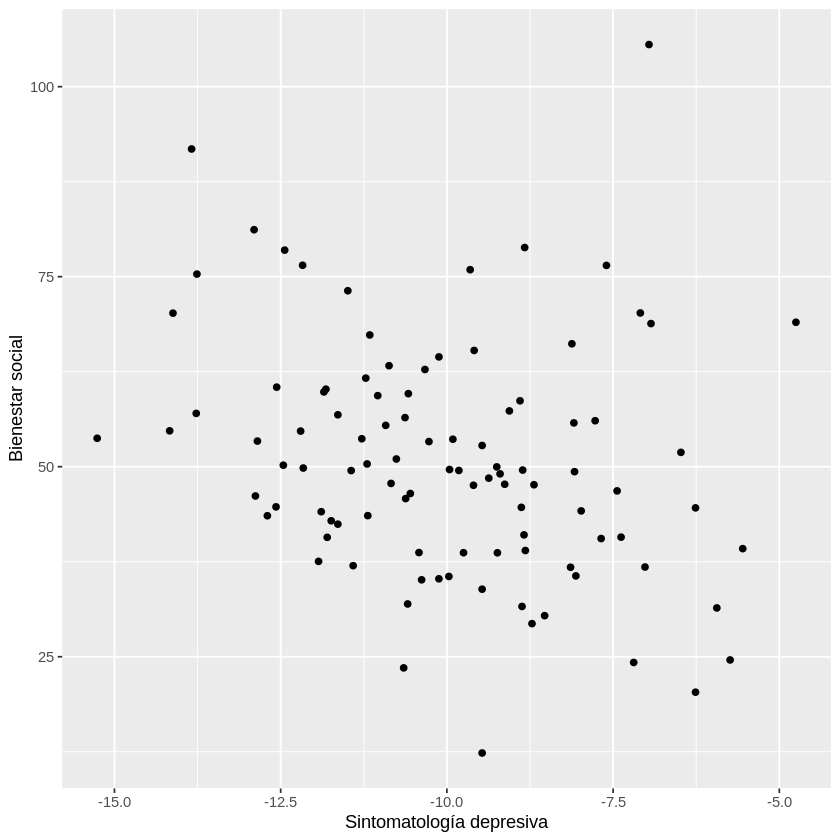

In [ ]:
data %>%
  ggplot(aes(x = Depresión, y = Bienestar_social)) +
  geom_point() +
  labs(x = "Sintomatología depresiva",
       y = "Bienestar social")

Se puede observar en la dispersión de puntos cierta tendencia hacia una relación inversa entre las variables. Pero se requiere realizar el contraste de hipótesis para concluir.

4. Evaluar la normalidad para aplicar el coeficiente de correlación pertinente.

In [ ]:
data %>%
  shapiro_test(Depresión, Bienestar_social)

variable,statistic,p
<chr>,<dbl>,<dbl>
Bienestar_social,0.9799528,0.1318133
Depresión,0.9945116,0.9604523


El análisis de normalidad indica para bienestar social un SW = .98, p = .132, y para sintomatología depresiva, SW = .995, p = .960, por lo que se acepta H0 y se rechaza H1. Es decir, las distribuciones de ambas variables son normales por lo que se llevará a cabo el análisis de correlación paramétrico de Pearson.

5. Analizar estadísticamente el contraste de hipótesis estadísticas (H0 y H1).  Aplica la regla de decisión.

- H0: $r_{xy} = 0$
- H1: $r_{xy} < 0$   , p unilateral

In [ ]:
data %>%
  cor_test(Depresión, Bienestar_social)

var1,var2,cor,statistic,p,conf.low,conf.high,method
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Depresión,Bienestar_social,-0.25,-2.504035,0.0139,-0.421346,-0.05127401,Pearson


- Contraste de hipótesis: Se acepta H1 al encontrar una relación estadísticamente significativa entre bienestar social y sintomatología depresiva, p = .007 (.014/2).

- Sentido: La relación es inversa, es decir, un mayor bienestar social se asocia con un menor nivel de sintomatología depresiva  y viceversa.

- Fortaleza: Según el criterio de Cohen (1988), la magnitud de la relación es pequeña.

6. Brindar respuesta a las hipótesis de trabajo, indicando si fue una correlación positiva, negativa o no hubo correlación significativa. En caso de darse una correlación significativa, indicar la fortaleza del coeficiente según los criterios de Cohen.

Los resultados del análisis de correlación de Pearson evidencian que existe una relación estadísticamente significativa, negativa y pequeña, según el criterio de Cohen (1988), entre el bienestar social y la sintomatología depresiva, r(98) = -.25, p =.007 (unilateral), por lo que se cumple la hipótesis del estudio.

> Nota: Los grados de libertad de los índices de asociación = n-2.